In [149]:
graphics_toolkit('gnuplot')
pkg load interval
addpath(genpath('./octave-interval-examples/m'))

In [150]:
load Temp20200601.mat
t = therm(7:8, :);
line_1 = therm(7, :);
line_2 = therm(8, :);
s = size(line_1);
x = 1:s(2);

DEBUG: FC_WEIGHT didn't match


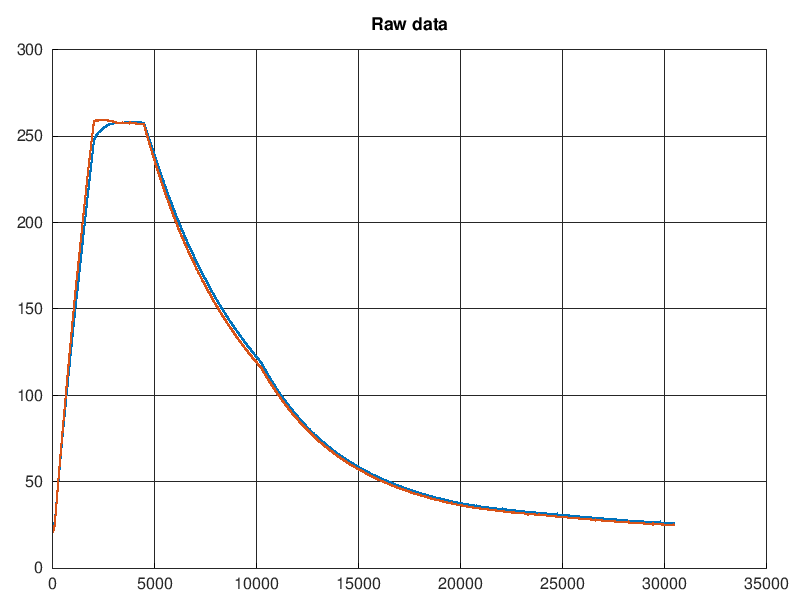

In [151]:
figure(1, 'position', [0, 0, 800, 600]);
grid on
hold on
plot(x, line_1, "linewidth", 4)
plot(x, line_2, "linewidth", 4)
title("Raw data", "fontsize", 16)
set(gca, 'fontsize', 16)
saveas(1, "data.png");

Примерно в [100, 2000] наблюдаем линейный участок. Необходимо исследовать область линейности функций: определить этот участок точнее. Возьмём диапазон с запасом.

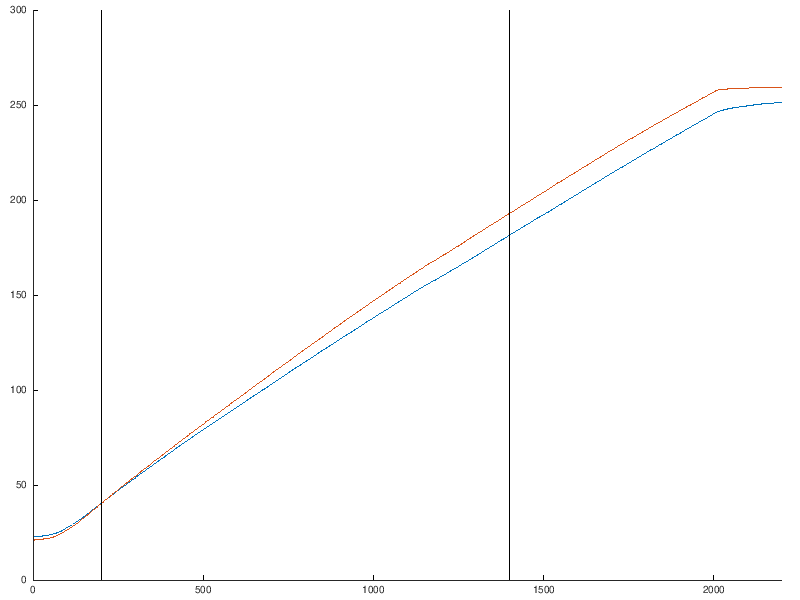

In [152]:
figure(1, 'position', [0, 0, 800, 600]);
%grid on
hold on
plot(x, line_1)
plot(x, line_2)
plot([200, 200], [0, 300], "k")
plot([1400, 1400], [0, 300], "k")
xlim([0, 2200])

In [153]:
left_threshold = 500;
right_threshold = 1000;

data_1 = line_1(left_threshold:right_threshold);
data_2 = line_2(left_threshold:right_threshold);
indexes = x(left_threshold:right_threshold);

DEBUG: FC_WEIGHT didn't match


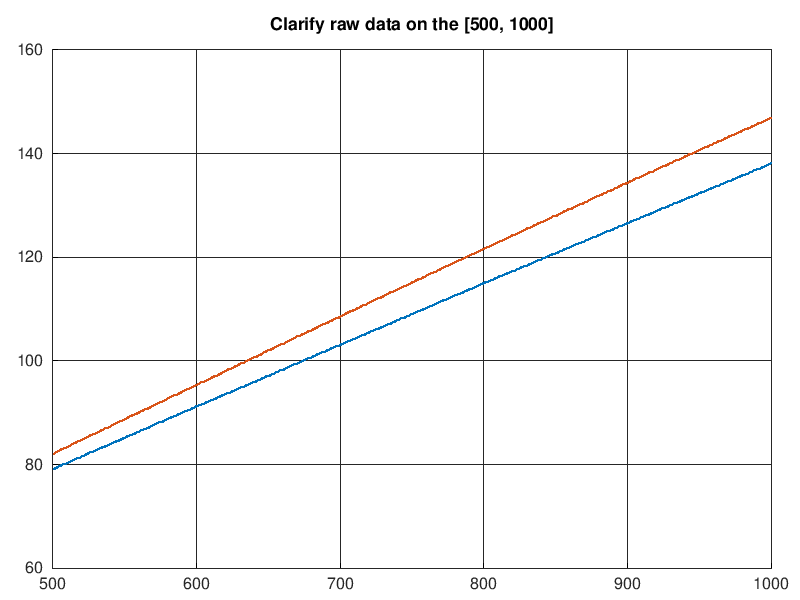

In [154]:
figure(1, 'position', [0, 0, 800, 600]);
grid on
hold on
plot(indexes, data_1, "linewidth", 4)
plot(indexes, data_2, "linewidth", 4)
title("Clarify raw data on the [500, 1000]", "fontsize", 16)
set(gca, 'fontsize', 16)
saveas(1, "section.png");

Рассмотрим подробнее синий график: отберем первые 10 значений.

In [155]:
n = 5;
start_i = 1;
step = 80;
end_i = n * step;
inds = [start_i:step:end_i]

inds =

     1    81   161   241   321



DEBUG: FC_WEIGHT didn't match


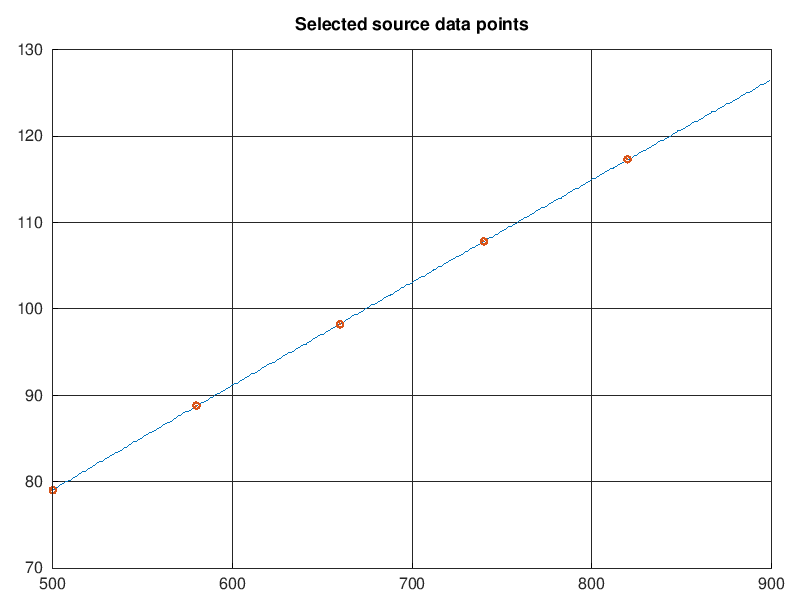

In [156]:
figure(1, 'position', [0, 0, 800, 600]);
grid on
hold on
plot(indexes(start_i:end_i), data_1(start_i:end_i), "-", "linewidth", 3)
plot(indexes(inds), data_1(inds), "o", "linewidth", 4)
title("Selected source data points", "fontsize", 16)
set(gca, 'fontsize', 16)
saveas(1, "line-points.png");

In [157]:
## Определить задачу построения интервальной регрессии 
##     y = X * beta = beta1 + beta2 * x 
## с ограничением beta2 >= 0

x = indexes(inds);        
y = data_1(inds);        

epsilon = zeros(1, n) + 0.1;  

x = reshape(x, size(x)(2), size(x)(1))
y = reshape(y, size(y)(2), size(y)(1))
epsilon = reshape(epsilon, size(epsilon)(2), size(epsilon)(1))

X = [ x.^0 x ];                              
lb = [-inf 0];                                
irp_temp = ir_problem(X, y, epsilon, lb);  

x =

   500
   580
   660
   740
   820

y =

    79.00
    88.80
    98.20
   107.80
   117.30

epsilon =

   0.1000
   0.1000
   0.1000
   0.1000
   0.1000



DEBUG: FC_WEIGHT didn't match


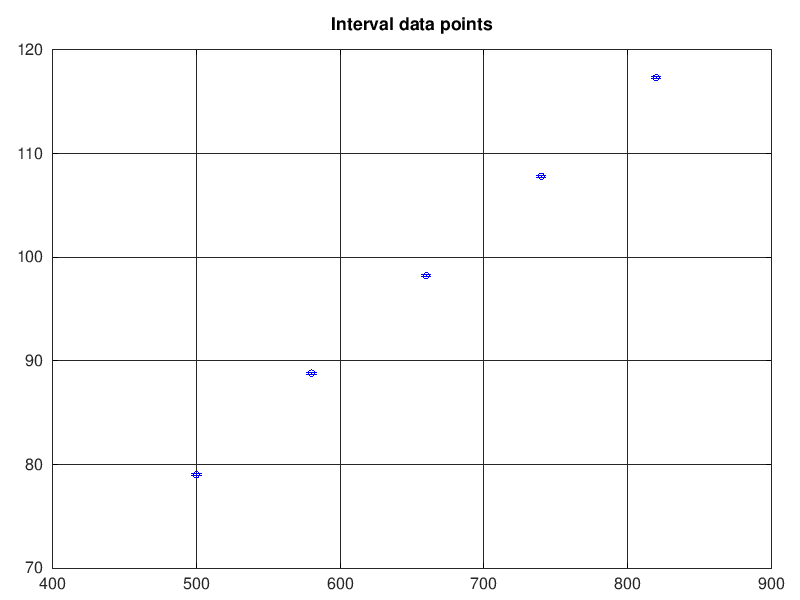

In [158]:
## График интервальных измерений
figure('position', [0, 0, 800, 600]);
hold on
grid on

ir_scatter(irp_temp);   
title("Interval data points")
set(gca, 'fontsize', 16)
saveas(1, "points.png");

Добавим график обычной МНК регрессии

In [159]:
## Линейная регрессия МНК
b_lsm = (X \ y)'  
MNK_line = [b_lsm(1) + b_lsm(2) * min(x), b_lsm(1) + b_lsm(2) * max(x)];

b_lsm =

   19.3500    0.1195



DEBUG: FC_WEIGHT didn't match


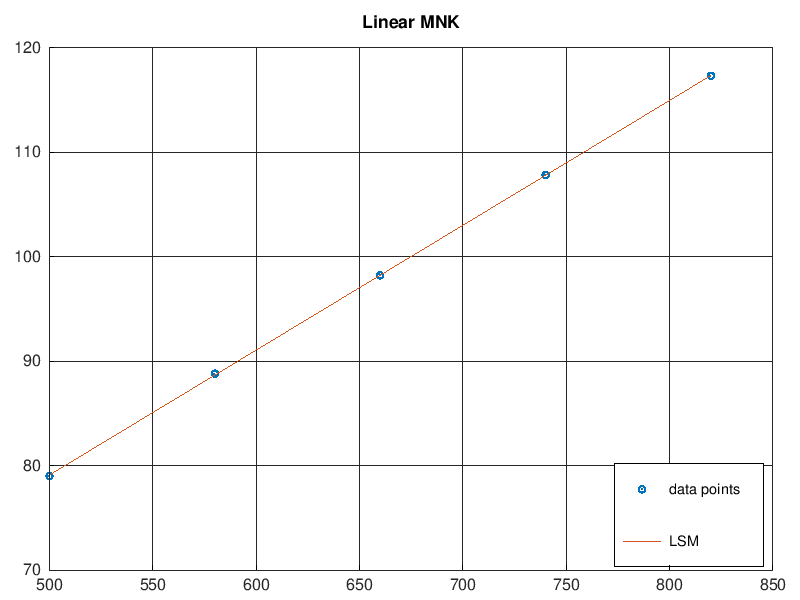

In [160]:
figure('position',[0, 0, 800, 600]);
hold on
grid on
plot(x, y, "o", "linewidth", 4)
plot([min(x),  max(x)], MNK_line, "linewidth", 3)

title("Linear MNK", 'fontsize', 16)
set(gca, 'fontsize', 16)
legend("data points", "LSM", "location", "southeast")
saveas(1, "linearMNK.png");

QH6412 qhull input error (qh_initqhull_globals): expecting between 1 and 2147483631 points.  Got 0 0-d points

While executing:  | qhull Qt
Options selected for Qhull 2019.1 2019/06/21:
  run-id 615291902  qh_QHpointer  Qtriangulate  _maxoutside  0
error: convhulln: qhull failed
error: called from
    ir_beta2poly at line 77 column 5
    ir_plotbeta at line 59 column 10


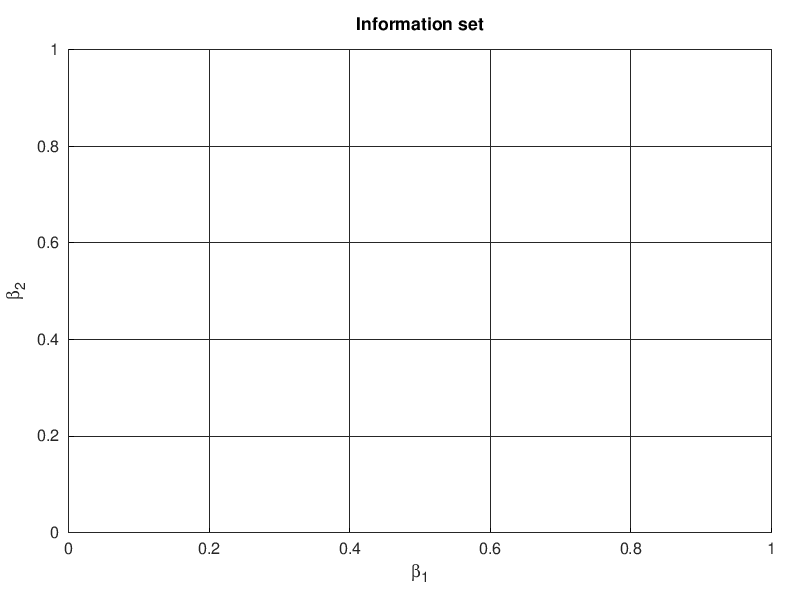

In [161]:
## Информационное множество
figure('position', [0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 16)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

##### Решение ЗЛП

In [162]:
eps = epsilon;
m = size(x)(1);
C = zeros(1, m + 2);
for i = 1:m
    C(i) = 1;
end
A = zeros(2 * m, m + 2);

for i = 1:m
    A(2 * i - 1, i) = eps(i);
    A(2 * i, i) = eps(i);

    A(2 * i - 1, m + 1) = 1;
    A(2 * i, m + 1) = -1;

    A(2 * i - 1, m + 2) = x(i);
    A(2 * i, m + 2) = -x(i);
end

% display(A)

B = zeros(1, 2 * m);
for i = 1:m
    B(2 * i - 1) = y(i);
    B(2 * i) = -y(i);
end

%display(B)

lb = zeros(1, m + 2);
for i = 1:m
    lb(i) = 1;
end
lb(m + 2) = -inf;

%display(lb)

ctype = "";
for i = 1:2 * m
    ctype(i) = 'L';
end

% display(ctype);

vartype = "";
for i = 1:m + 2
    vartype(i) = 'C';
end

% display(vartype);

sense = 1;
w = glpk(C, A, B, lb, [], ctype, vartype, sense)

w =

    1.0000
    1.2500
    1.0000
    1.0000
    1.0000
   19.2562
    0.1197



## Повторные решения задачи с удалением выбросов

In [163]:
scale = max(w(1:n))
for i = 1:n
    eps(i) = epsilon(i) * scale;
end

X = [ x.^0 x ];                               # матрица значений переменных при beta1 и beta2
lb = [-inf 0];                                # нижние границы beta1 и beta2
irp_temp = ir_problem(X, y, eps, lb);    # создание переменной, содержащей описание задачи 

scale =  1.250


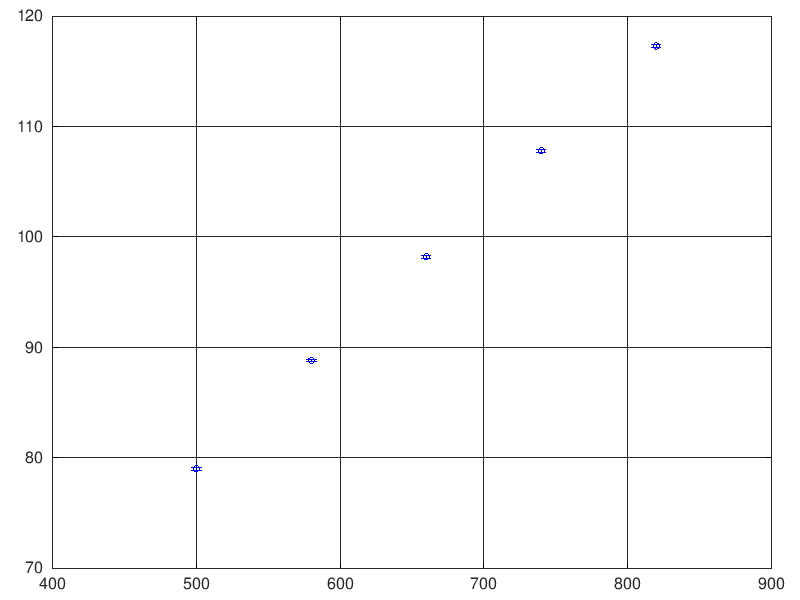

In [165]:
## График интервальных измерений
figure('position', [0, 0, 800, 600]);
hold on
grid on
ir_scatter(irp_temp);   
set(gca, 'fontsize', 16)

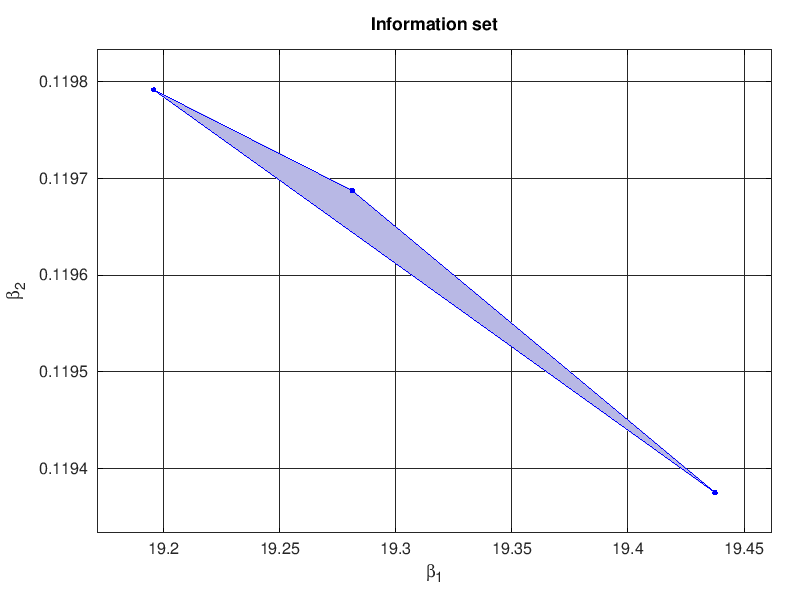

In [168]:
## Информационное множество
figure('position', [0, 0, 800, 600]);
grid on
hold on
ir_plotbeta(irp_temp)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set', 'fontsize', 16)
set(gca, 'fontsize', 16)

In [169]:
## Вершины информационного множества задачи построения интервальной регрессии
vertices = ir_beta2poly(irp_temp)

## Диаметр и наиболее удаленные вершины информационного множества 
[rhoB, b1, b2] = ir_betadiam(irp_temp)

vertices =

   19.1958    0.1198
   19.4375    0.1194
   19.2812    0.1197

rhoB =  0.2417
b1 =

   19.4375    0.1194

b2 =

   19.1958    0.1198



In [170]:
## Внешние интервальные оценки параметров модели y = beta1 + beta2 * x 
b_int = ir_outer(irp_temp)

b_int =

   19.1958   19.4375
    0.1194    0.1198



In [171]:
## Точечные оценки параметров 
b_maxdiag = (b1 + b2) / 2    # как середина наибольшей диагонали информационного множества

b_gravity = mean(vertices)   # как центр тяжести информационного множества 

b_lsm = (X \ y)'             # методом наименьших квадратов

b_maxdiag =

   19.3167    0.1196

b_gravity =

   19.3049    0.1196

b_lsm =

   19.3500    0.1195



DEBUG: FC_WEIGHT didn't match


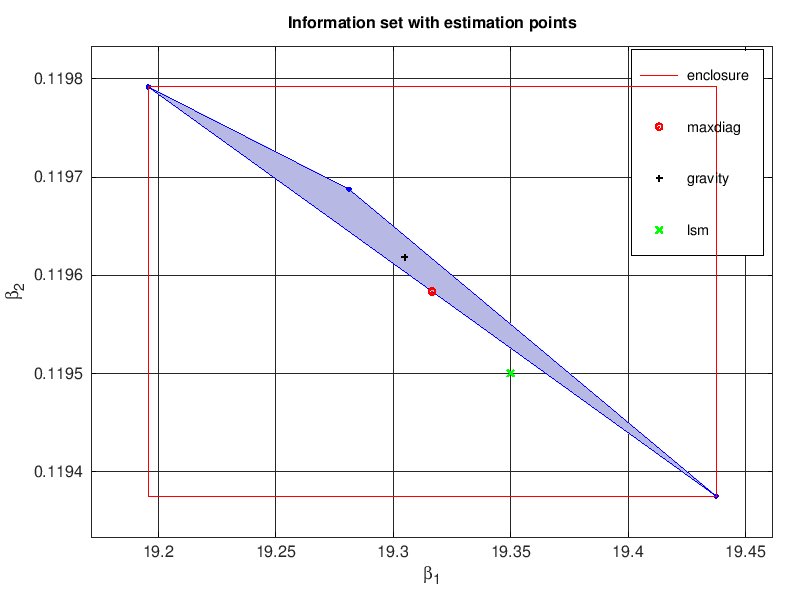

In [182]:
## Внешняя интервальная оценка информационного множества
figure('position', [0, 0, 800, 600]);
hold on
grid on
ir_plotbeta(irp_temp)
ir_plotrect(b_int, 'r-')
set(gca, 'fontsize', 16)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set with estimation points', 'fontsize', 16)

## Точечные оценки
plot(b_maxdiag(1), b_maxdiag(2), 'ro', 'linewidth', 5)
plot(b_gravity(1), b_gravity(2), 'k+', 'linewidth', 5)
plot(b_lsm(1), b_lsm(2), 'gx', 'linewidth', 5)
legend("", "", "enclosure", "maxdiag",  "gravity", "lsm")
saveas(1, "infoset.png");

DEBUG: FC_WEIGHT didn't match


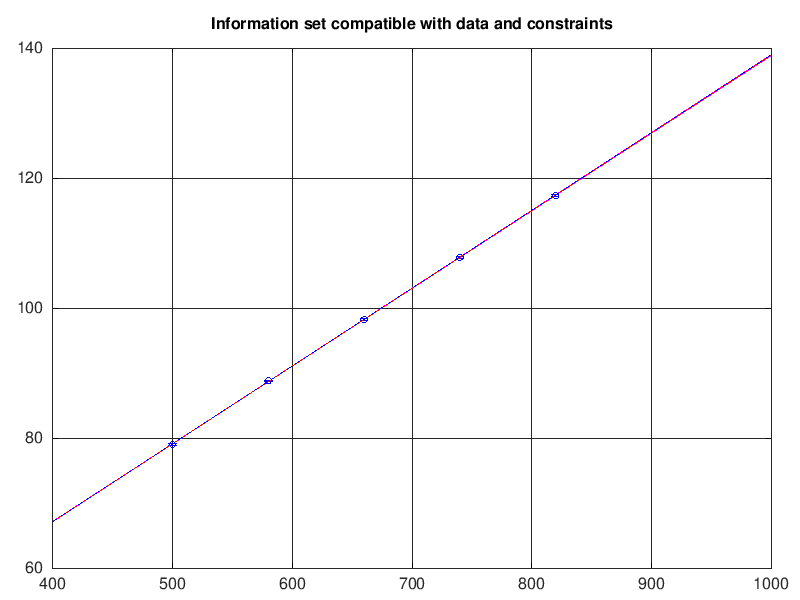

In [190]:
## Коридор совместных зависимостей для модели y = beta1 + beta2 * x
figure('position', [0, 0, 800, 600]);
hold on
grid on
xlimits = [400 1000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей
ir_scatter(irp_temp, 'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  

set(gca, 'fontsize', 16)
title('Information set compatible with data and constraints', 'fontsize', 16)
saveas(1, "infosetHall.png");

DEBUG: FC_WEIGHT didn't match


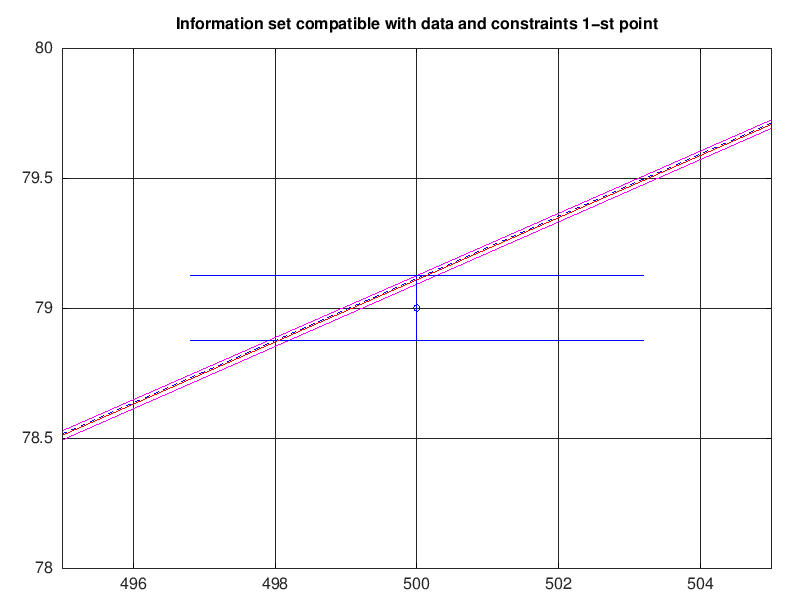

In [192]:
## Коридор совместных зависимостей для модели y = beta1 + beta2 * x около первой точки
figure('position', [0, 0, 800, 600]);
hold on
grid on
xlimits = [400 1000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей
ir_scatter(irp_temp, 'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  

xlim([495, 505])
ylim([78, 80])

set(gca, 'fontsize', 16)
title('Information set compatible with data and constraints 1-st point', 'fontsize', 16)
saveas(1, "infosetHall1.png");

### Предсказание значений функции

In [196]:
## Значения функции, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
yp0 = ir_predict(irp_temp, X)       # интервальный прогноз значений y в точках x

yp0mid = mean(yp0,2)                 # средние значения прогнозных интервалов
yp0rad = 0.5 * (yp0(:,2) - yp0(:,1)) # радиус прогнозных интервалов

yp0rad_rel = 100 * yp0rad ./ yp0mid  # относительная величина неопределенности прогнозов в процентах

yp0 =

    79.09    79.13
    88.68    88.70
    98.22    98.28
   107.77   107.85
   117.32   117.43

yp0mid =

    79.11
    88.69
    98.25
   107.81
   117.38

yp0rad =

   0.01667
   0.01250
   0.02500
   0.03750
   0.05000

yp0rad_rel =

   0.02107
   0.01410
   0.02545
   0.03479
   0.04260



In [197]:
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках наблюдения неопределенности 
xp = [200; 450; 600; 950; 1800]      # точки наблюдения
Xp = [xp.^0 xp];

yp = ir_predict(irp_temp, Xp)         # интервальный прогноз значений y в точках xp
ypmid = mean(yp, 2)                     # средние значения прогнозных интервалов
yprad = 0.5 * (yp(:,2) - yp(:,1))      # радиус прогнозных интервалов

yprad_relative = 100 * yprad ./ ypmid  # относительная величина неопределенности прогнозов в процентах

xp =

    200
    450
    600
    950
   1800

yp =

    43.15    43.31
    73.10    73.16
    91.06    91.09
   132.84   133.00
   234.31   234.82

ypmid =

    43.23
    73.13
    91.08
   132.92
   234.57

yprad =

   0.07917
   0.02709
   0.01563
   0.07709
   0.25419

yprad_relative =

   0.18313
   0.03704
   0.01716
   0.05800
   0.10837



### Граничные точки

In [198]:
# Поиск граничных точек
MY_EPS = 0.00001;
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
irp_temp;
cur_x = irp_temp.y;
cur_eps = irp_temp.epsilon;

yp0 = ir_predict(irp_temp, X); 

for i = 1 : n
    x_top = cur_x(i) + cur_eps(i);
    x_bot = cur_x(i) - cur_eps(i);

    y_top = yp0(i, 2);
    y_bot = yp0(i, 1);

    if abs(y_top - x_top) < MY_EPS
        display(i)

    end

    if abs(y_bot - x_bot) < MY_EPS
        display(i)
    end
end



i =  1
i =  2
i =  5


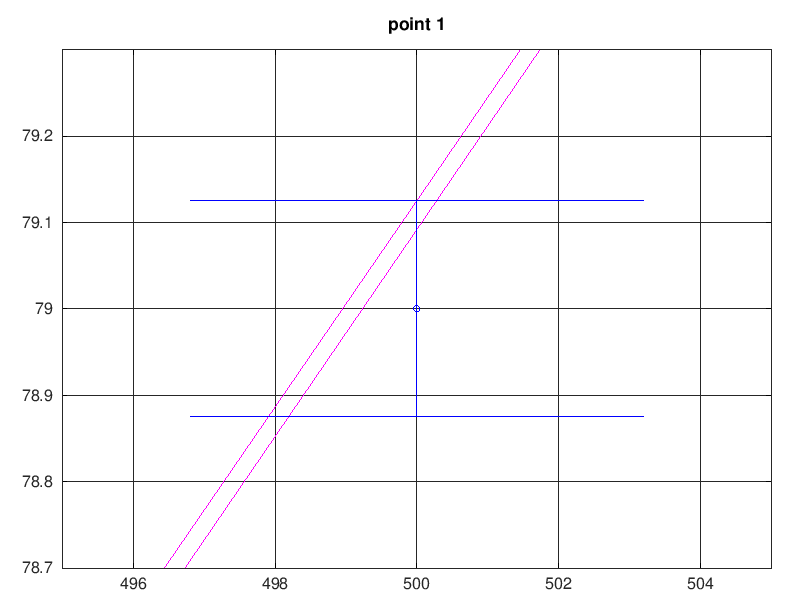

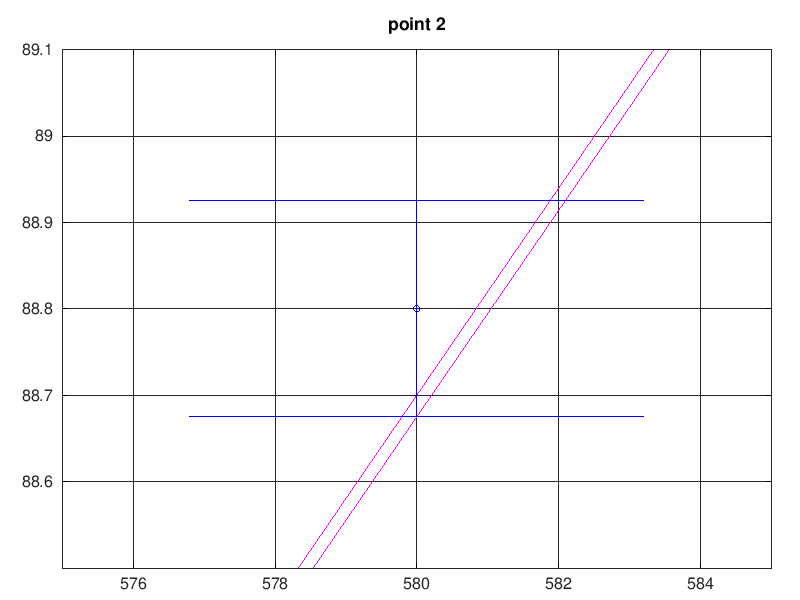

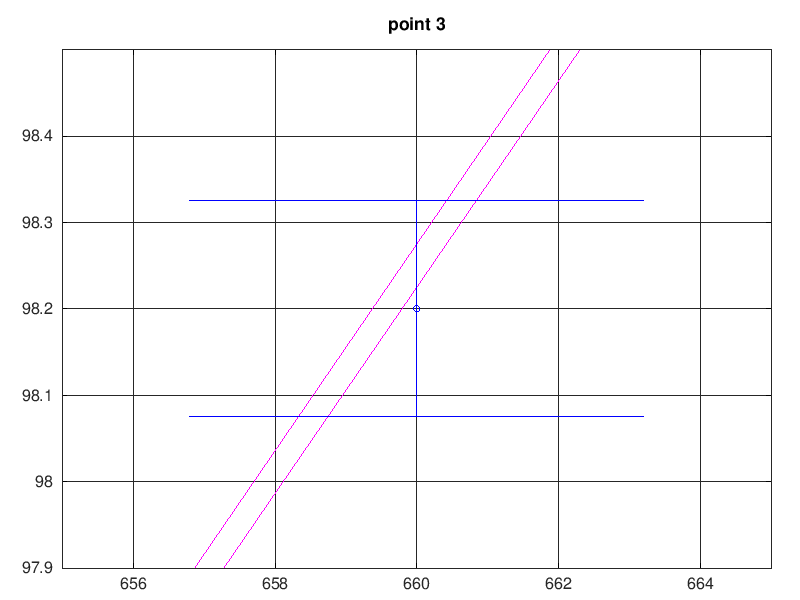

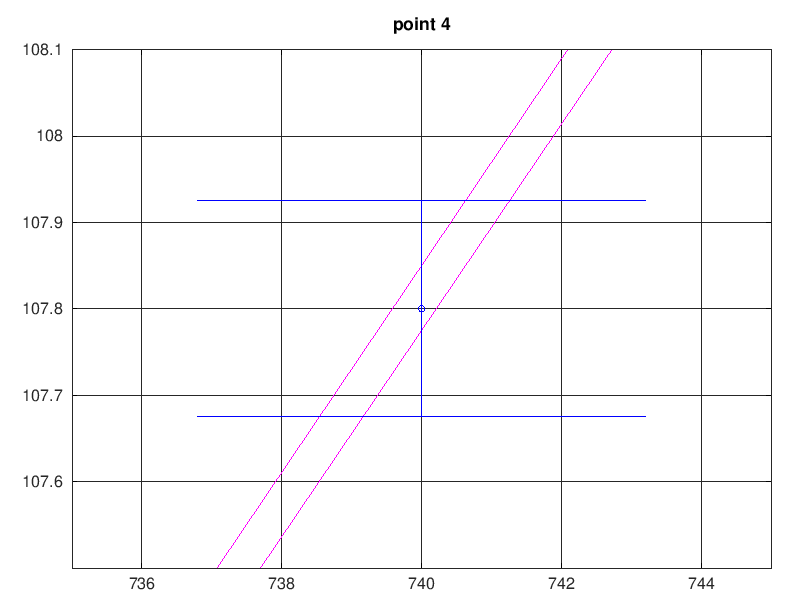

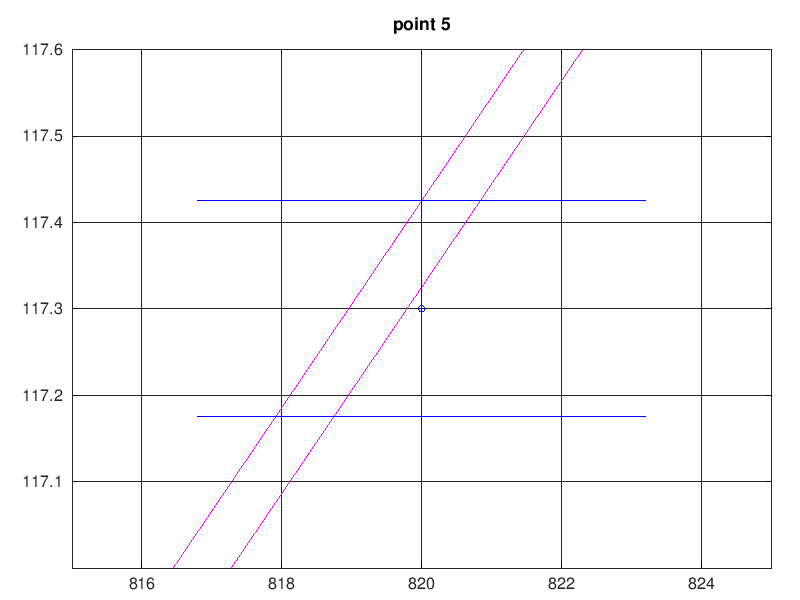

In [208]:
# Граничные точки, графики 
border_x = [-5, 5];
border_y = [-0.3, 0.3];

for i = 1 : m
    cur_point_x = x(i);
    cur_point_y = y(i);

    figure('position',[0, 0, 800, 600]);
    xlimits = [400 1000];
    hold on
    grid on
    ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей
    ir_scatter(irp_temp, 'bo')              # интервальные измерения

    xlim([cur_point_x + border_x(1), cur_point_x + border_x(2)]);
    ylim([cur_point_y + border_y(1), cur_point_y + border_y(2)]);
    title(["point " int2str(i)], 'fontsize', 16)
    set(gca, 'fontsize', 16)
end